## Chi-Square types

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### 1. Goodness of fit

In [11]:
from scipy.stats import chisquare,chi2

In [12]:
chisquare([22,23,24,24,32,25],[25,25,25,25,25,25])

Power_divergenceResult(statistic=2.56, pvalue=0.7674330802714071)

- you can accept the hypothesis as p-value > 0.05

In [13]:
chisquare([22,23,24,24,32,25])

Power_divergenceResult(statistic=2.56, pvalue=0.7674330802714071)

- The results will be the same as the expected values are equal, so you have the choice if you want to write it or not

In [14]:
chisquare([22,23,24,24,32,25],[75,15,15,15,15,15])

Power_divergenceResult(statistic=78.45333333333333, pvalue=1.7672981593220193e-15)

### 2. Chi-Square Independence

#### Try on Titanic dataset

In [15]:
data = pd.read_csv("titanic_dataset.csv")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: xlabel='Survived', ylabel='count'>

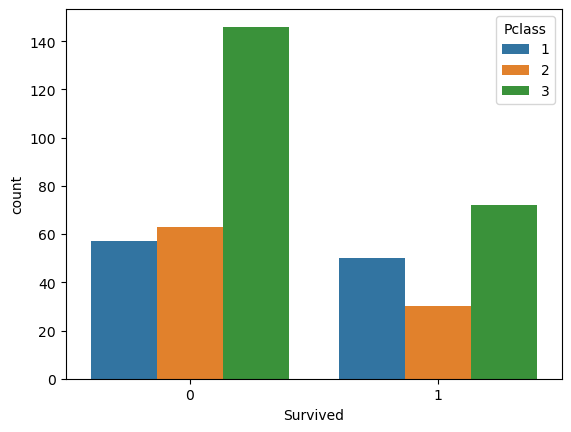

In [18]:
# hue = "according to"
sns.countplot(data,x="Survived",hue="Pclass")

<Axes: xlabel='Pclass', ylabel='Survived'>

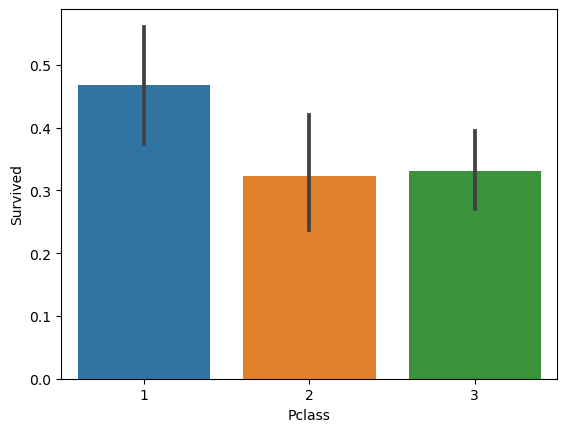

In [19]:
# if I want to know the proportion for each class with confidence interval
sns.barplot(data,x="Pclass",y="Survived")

In [23]:
data["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [24]:
# Expected values
# for survived
266/(266+152)

0.6363636363636364

- For each class, the percentage of survived is expected to be 0.63%

In [25]:
# Expected values
# for survived
152/(266+152)

0.36363636363636365

- For each class, the percentage of unsurvived is expected to be 0.36%

In [20]:
pd.crosstab(data["Survived"],data["Pclass"])

Pclass,1,2,3
Survived,,,
0,57,63,146
1,50,30,72


In [21]:
obs = pd.crosstab(data["Survived"],data["Pclass"])

In [22]:
from scipy.stats import chi2_contingency
chi2_contingency(obs)

Chi2ContingencyResult(statistic=6.693869422819262, pvalue=0.03519206276590605, dof=2, expected_freq=array([[ 68.09090909,  59.18181818, 138.72727273],
       [ 38.90909091,  33.81818182,  79.27272727]]))

- Pvalue < 0.05 , so we will reject the hypothesis
- This means that Pclass affects the survived condition

-------------------------

## ANOVA

In [2]:
data = pd.read_csv("titanic_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: xlabel='Pclass', ylabel='Age'>

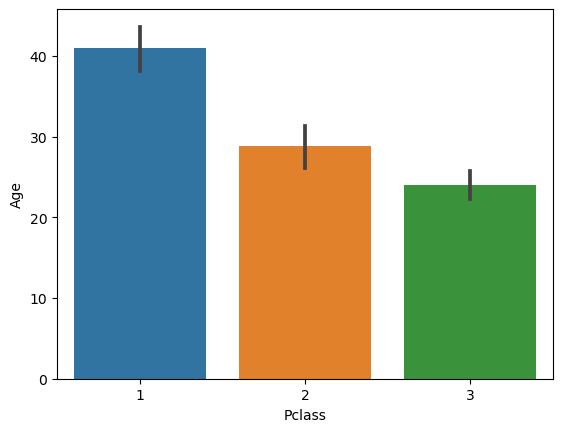

In [4]:
sns.barplot(data,x="Pclass",y="Age")

We have an assumption that **Age** variable does not affect **Pclass**, we will try to reject or not to reject that assumption

I need to make sure that the dataset has no null values 

In [5]:
d = data[['Pclass','Age']].dropna()

In [6]:
d

,Pclass,Age
0,3,34.5
1,3,47.0
2,2,62.0
3,3,27.0
4,3,22.0
...,...,...
409,3,3.0
411,1,37.0
412,3,28.0
414,1,39.0


In [7]:
from scipy.stats import f_oneway

- We need to pass to this function the seperated groups 

In [8]:
d.groupby("Pclass").get_group(1)["Age"].values

array([46. , 23. , 47. , 55. , 21. , 48. , 22. , 41. , 30. , 45. , 45. ,
       60. , 24. , 28. , 36. , 13. , 47. , 31. , 60. , 28.5, 35. , 32.5,
       55. , 67. , 49. , 27. , 25. , 76. , 43. , 36. , 63. , 36. , 35. ,
       53. , 33. , 61. , 42. , 23. , 29. , 42. , 48. , 54. , 64. , 37. ,
       18. , 27. ,  6. , 47. , 33. , 42. , 57. , 50. , 53. , 21. , 39. ,
       64. , 48. , 55. , 45. , 41. , 27. , 46. , 26. , 24. , 53. , 30. ,
       64. , 30. , 55. , 55. , 57. , 33. , 39. , 46. , 39. , 30. , 58. ,
       45. , 50. , 59. , 25. , 45. , 31. , 49. , 54. , 45. , 55. , 23. ,
       51. , 18. , 48. , 30. , 22. , 17. , 43. , 50. , 37. , 39. ])

In [9]:
c1 = d.groupby("Pclass").get_group(1)["Age"].values
c2 = d.groupby("Pclass").get_group(2)["Age"].values
c3 = d.groupby("Pclass").get_group(3)["Age"].values

In [10]:
f_oneway(c1,c2,c3)

F_onewayResult(statistic=56.40445192973902, pvalue=8.662751923341827e-22)

- The value of Pvalue is very small, then we can reject that hypothesis/assumption which say that Pclass and Age is independent

Let's see the variance between the groups and variance within each group

According to ANOVA test, the `Pcalss` dependents on `Age`. So we must find a large variance between the groups and the variance within each group should be small and almost equal to the other groups

In [11]:
# variance within each group
c1.var()

192.80456059975012

In [12]:
c2.var()

165.6293164772727

In [13]:
c3.var()

110.27010399699758

- The variance within groups almost closer to each other, but it will be more accurate if the variance of c3 more bigger 

<Axes: xlabel='Pclass', ylabel='Age'>

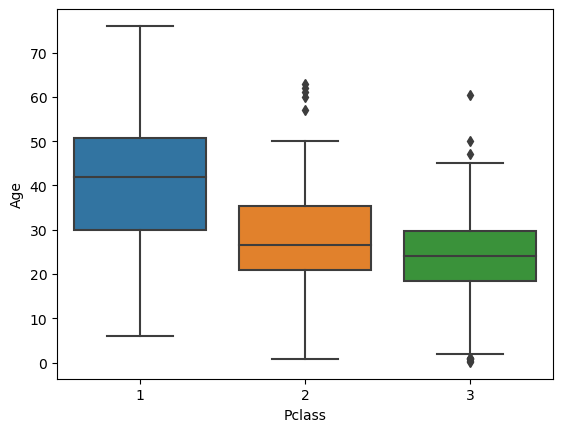

In [15]:
# variance between the groups
sns.boxplot(data= d, x= "Pclass", y= "Age")

**Note**
- Although ANOVA test say that these groups are affected by Age (dependent), but in the graph it seems that class_2 and class_3 have means closed to each other.
- We can see that there are outliers in Class_2 and class_3.
- This affects the means of each group and makes them more closer to each other, so you need to fix them to get more clearly insights.

-----------------------

## Covariance

**Example about Ice cream shop :**
- If the temperature affects the sales 

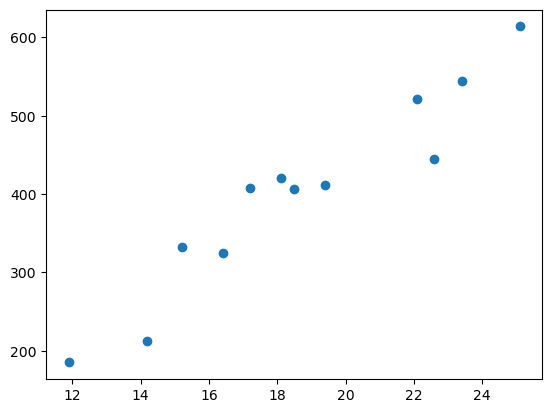

In [17]:
temp = [14.2,16.4,11.9,15.2,18.5,22.1,19.4,25.1,23.4,18.1,22.6,17.2]
sales = [212,325,185,332,406,522,412,614,544,421,445,408]
plt.scatter(temp,sales)

In [18]:
np.cov(temp,sales)

array([[   16.08931818,   485.31363636],
       [  485.31363636, 15989.78787879]])

--------------

## Correlation

In [21]:
np.corrcoef(temp,sales)

array([[1.        , 0.95682458],
       [0.95682458, 1.        ]])

In [19]:
from scipy.stats import pearsonr

H0: No correlation

In [20]:
pearsonr(temp,sales)

PearsonRResult(statistic=0.9568245788649614, pvalue=1.0988099621215254e-06)

- We can reject H0 as Pvalue < 0.05